In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 1. Dataset Preparation
max_features = 10000  # Number of words to consider as features
maxlen = 200  # Cut texts after this number of words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [7]:
# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# 2. Building the RNN Model
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),  # Embedding layer: converts word indices to dense vectors
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer: processes sequence data
    Dense(1, activation='sigmoid')  # Output layer: produces final prediction
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile the model, used binary_crossentropy loss function for binary classification
#used adam optimizer, which is an efficient variant of gradient descent algorithm
#metrics=['accuracy'] to evaluate the model performance

In [9]:
# 3. Training the Model
history = model.fit(x_train, y_train,
                    epochs=10,  # Number of times to iterate over the entire dataset
                    batch_size=32,  # Number of samples per gradient update
                    validation_split=0.2,  # Fraction of training data to use for validation
                    verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.6963 - loss: 0.5681 - val_accuracy: 0.8166 - val_loss: 0.4028
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8678 - loss: 0.3237 - val_accuracy: 0.8132 - val_loss: 0.4449
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8878 - loss: 0.2796 - val_accuracy: 0.8436 - val_loss: 0.3966
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9060 - loss: 0.2437 - val_accuracy: 0.8344 - val_loss: 0.4171
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9278 - loss: 0.1904 - val_accuracy: 0.8376 - val_loss: 0.4118
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9476 - loss: 0.1403 - val_accuracy: 0.8460 - val_loss: 0.4360
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9560 - loss: 0.1224 - val_accuracy: 0.8456 - val_loss: 0.4364
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9650 - loss: 0.0964 - 

In [10]:
# 4. Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Evaluate the model on the test data
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.836


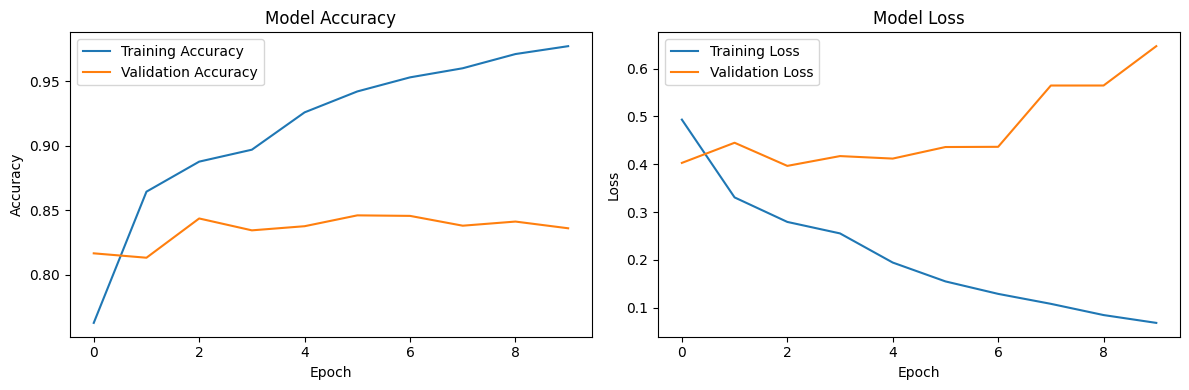

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# 5. Hyperparameter Tuning with Keras Tuner
# sequential model with LSTM layer and dropout layer
def create_model(lstm_units=64, dropout_rate=0.2):
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example of tuning LSTM units
lstm_units_options = [32, 64, 128]  # Different numbers of LSTM units to try
results = []

for units in lstm_units_options:
    model = create_model(lstm_units=units)
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0) # Train the model
    val_acc = max(history.history['val_accuracy'])
    results.append((units, val_acc))

for units, acc in results:
    print(f'LSTM units: {units}, Best validation accuracy: {acc:.3f}')

LSTM units: 32, Best validation accuracy: 0.848
LSTM units: 64, Best validation accuracy: 0.844
LSTM units: 128, Best validation accuracy: 0.855


LSTM units of 128 performed slightly better (0.855 validation accuracy) compared to 32 and 64 units.
The differences in performance are minimal, suggesting that the model is relatively robust to changes in the number of LSTM units within this range.

In [13]:
# 6. Comparative Analysis
# Implementing a simple feedforward neural network for comparison
ff_model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

ff_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ff_history = ff_model.fit(x_train, y_train,
                          epochs=10,  # Number of times to iterate over the entire dataset
                          batch_size=32,  # Number of samples per gradient update
                          validation_split=0.2,  # Fraction of training data to use for validation
                          verbose=1) #verbose to display training progress

ff_test_loss, ff_test_acc = ff_model.evaluate(x_test, y_test, verbose=0)
print(f'Feedforward NN Test accuracy: {ff_test_acc:.3f}')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7031 - loss: 0.5597 - val_accuracy: 0.8562 - val_loss: 0.3301
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8914 - loss: 0.2680 - val_accuracy: 0.8810 - val_loss: 0.2914
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9204 - loss: 0.2044 - val_accuracy: 0.8742 - val_loss: 0.3192
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9303 - loss: 0.1790 - val_accuracy: 0.8672 - val_loss: 0.3398
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9556 - loss: 0.1312 - val_accuracy: 0.8710 - val_loss: 0.3633
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9573 - loss: 0.1214 - val_accuracy: 0.8722 - val_loss: 0.3770
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9657 - loss: 0.0928 - val_accuracy: 0.8688 - val_loss: 0.4058
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9714 - loss: 0.0858 - val_accu



In the training the model shows rapid improvement in the first few epochs, with training accuracy increasing from 70.31% to 89.14% in just two epochs.
Training accuracy continues to improve, reaching 97.73% by the final epoch.
Validation accuracy peaks early (88.10% in epoch 2) and then slightly decreases and stabilizes around 85-87%.
This pattern suggests some overfitting as training continues.
Loss Curves, training loss consistently decreases throughout training, reaching a very low value of 0.0684 by the end.
Validation loss, however, starts increasing after the second epoch, further indicating overfitting.
Overfitting, the growing gap between training and validation accuracy/loss curves is a clear sign of overfitting.
The model is learning to perform extremely well on the training data but is not generalizing as effectively to unseen data.


Model comparison, feedforward neural network achieves a test accuracy of 83.1%, which is lower than the LSTM model's best validation accuracy.
This suggests that the LSTM architecture is more suitable for this task, likely due to its ability to capture sequential dependencies in the text data.


Early Stopping, based on the validation accuracy, the model's performance peaks around epoch 2-3. Implementing early stopping at this point could help prevent overfitting and potentially improve generalization.


Recommendations, implement regularization techniques (e.g., increase dropout, add L2 regularization) to combat overfitting.
Use early stopping to prevent the model from training beyond the point of optimal generalization.
Consider reducing model complexity or increasing the amount of training data if possible.
Experiment with different architectures or ensemble methods to potentially improve performance further.



The LSTM model shows promising performance, there's clear evidence of overfitting. Addressing this issue could lead to a more robust and generalizable model.